In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/anishanburaja/Downloads/ot_delaycause1_DL/Airline_Delay_Cause.csv')
print(data.head())
missing_values = data.isnull().sum()
delay_reasons = {
    'Carrier Delay': data[['carrier_ct', 'carrier_delay']].rename(columns={'carrier_ct': 'count', 'carrier_delay': 'duration'}),
    'Weather Delay': data[['weather_ct', 'weather_delay']].rename(columns={'weather_ct': 'count', 'weather_delay': 'duration'}),
    'NAS Delay': data[['nas_ct', 'nas_delay']].rename(columns={'nas_ct': 'count', 'nas_delay': 'duration'}),
    'Security Delay': data[['security_ct', 'security_delay']].rename(columns={'security_ct': 'count', 'security_delay': 'duration'}),
    'Late Aircraft Delay': data[['late_aircraft_ct', 'late_aircraft_delay']].rename(columns={'late_aircraft_ct': 'count', 'late_aircraft_delay': 'duration'})
}

delay_summary = {
    reason: {
        'total_count': delay_data['count'].sum(),
        'average_duration': delay_data['duration'].mean()
    } 
    for reason, delay_data in delay_reasons.items()
}

delay_summary_df = pd.DataFrame(delay_summary).T


   year  month carrier       carrier_name airport  \
0  2023      1      9E  Endeavor Air Inc.     ABE   
1  2023      1      9E  Endeavor Air Inc.     ABY   
2  2023      1      9E  Endeavor Air Inc.     AEX   
3  2023      1      9E  Endeavor Air Inc.     AGS   
4  2023      1      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         14.0        1.0   
1             Albany, GA: Southwest Georgia Regional         82.0       10.0   
2           Alexandria, LA: Alexandria International         60.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field         26.0        6.0   
4                   Albany, NY: Albany International        109.0       30.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        0.00        1.00  ...          0.0              0.00            0.0   
1        6.06        1.72  ...          

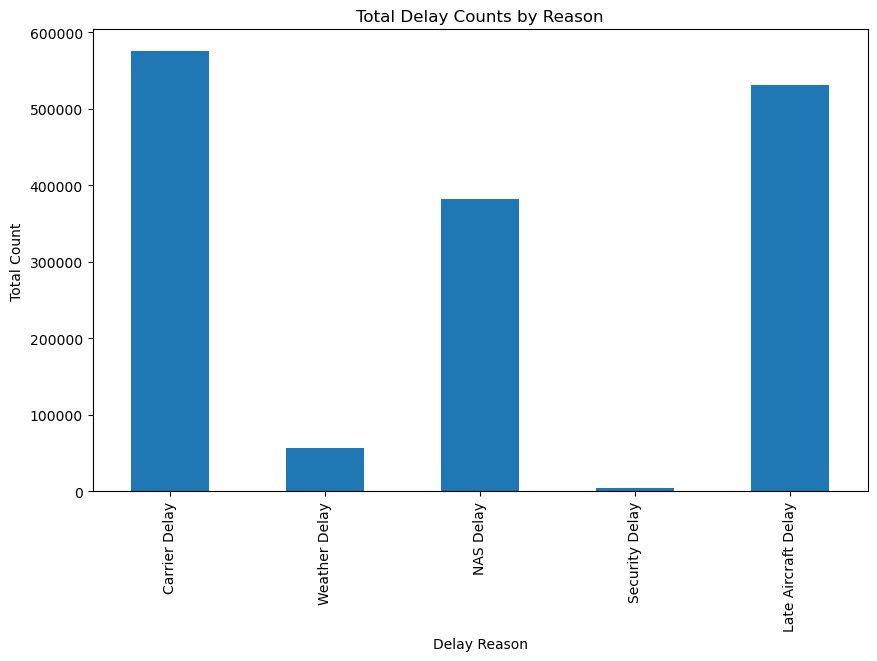

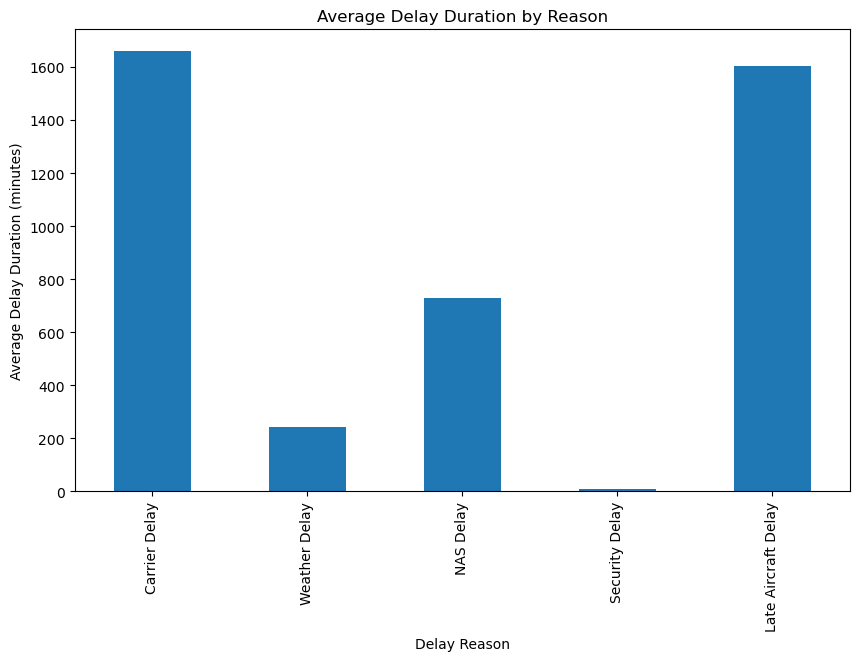

                     total_count  average_duration
Carrier Delay          574930.60       1658.744849
Weather Delay           57441.71        242.229757
NAS Delay              382115.26        728.451747
Security Delay           4623.49          8.646893
Late Aircraft Delay    531487.35       1602.316444


In [4]:
plt.figure(figsize=(10, 6))
delay_summary_df['total_count'].plot(kind='bar')
plt.title('Total Delay Counts by Reason')
plt.xlabel('Delay Reason')
plt.ylabel('Total Count')
plt.show()

plt.figure(figsize=(10, 6))
delay_summary_df['average_duration'].plot(kind='bar')
plt.title('Average Delay Duration by Reason')
plt.xlabel('Delay Reason')
plt.ylabel('Average Delay Duration (minutes)')
plt.show()

print(delay_summary_df)